# Differential Forms <img height="60" src="sample_img/logo.png" width="60"/>

### Import

In [13]:
import os
from datetime import date
from pathlib import Path

import matplotlib
import numpy as np
import seaborn as sns

from drawings.Phasor import Phasor, Pintograph
from drawings.Canvas import DrawingCanvas
from utils import timeline

matplotlib.use('TkAgg')
%matplotlib inline

np.set_printoptions(suppress=True)
sns.set_theme()

draw_path = Path("images")
draw_path.mkdir(exist_ok=True)

today_path = Path("images") / date.today().strftime("%d-%m-%y")
today_path.mkdir(exist_ok=True)
os.environ["today_path"] = str(today_path)

## Drawings

In [14]:
t = timeline(t_max=100, dt=1)
tmax = 100.000001  # to include last tmax as last value
dt = 0.01

pi = np.pi
tim = timeline(tmax, dt)
u = tim / tmax
T = tmax

How to plot multiple curves:
- draw your curve as usual (kee in mind that when you do .rotate() you modify the starting curve, so if you want to rotate the same one multiple times you have to create it as many times)
- add each curve to a DrawingCanvas (you can either add a list of curve or a single curve)
- call DrawingCanvas.plot() where you can specify the colour of each curve, it can be either a RGB one (e.g. [1,0,0] for red) or matplotlib colours ("r"). For more details see [matplotlib docs](https://matplotlib.org/stable/tutorials/colors/colors.html)

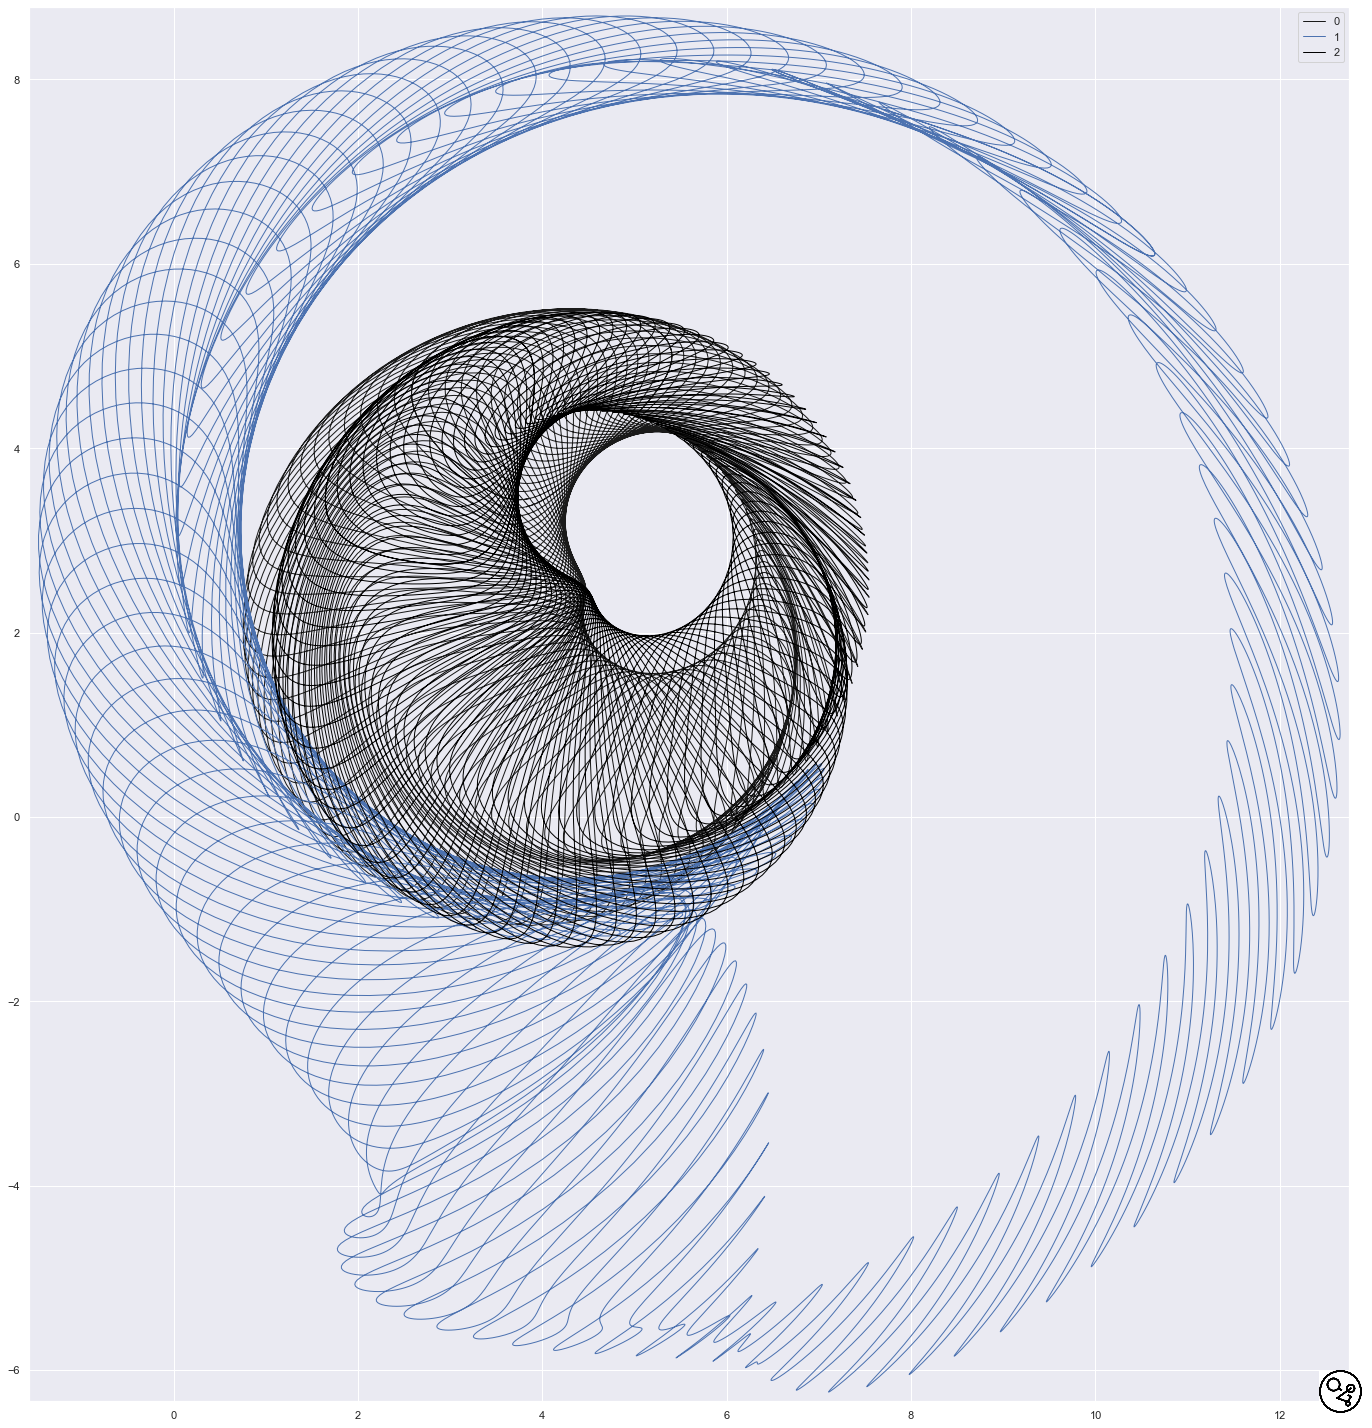

In [15]:
r1 = 1.3 + np.sin(2 * pi * u *0)
r2 = 1. + np.sin(2 * pi * u)

curve = Phasor(time=tim, x_cent=0, y_cent=0, radius=r1, period=1, phase=pi)
curve2 = Phasor(time=tim, x_cent=8, y_cent=0, radius=r2, period=1, phase=0)
pinto = Pintograph(curve1=curve, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0)
pinto1 = Pintograph(curve1=pinto, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0.3)
pinto2 = Pintograph(curve1=curve, curve2=curve2, arm1=6.2, arm2=6.2, extension=0).rotate(4.5, 2.5, tmax, 0.6)
canv = DrawingCanvas().add([pinto, pinto1, pinto2])
canv.plot(linecolor=["k", "b", list(np.random.choice(range(1), size=3))], save=False, legend=True, logo=True)